## *Elements of Machine Learning* 2023
### <font size=3 color='gray'>Alan Reyes-Figueroa</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import k_means

from sklearn.datasets import load_iris, make_circles, make_moons, make_blobs
from skimage.data import chelsea, coffee
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## K-means

In [3]:
data = load_iris()

In [4]:
X = data['data']
y = data['target']

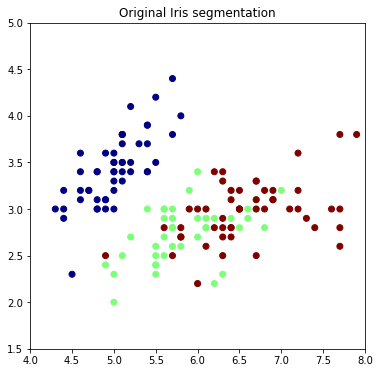

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.jet)
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.title('Original Iris segmentation')
plt.show()

In [6]:
k = 3
centers, labels, u = k_means(X[:,:2], n_clusters=k, algorithm='auto', init='random')

In [7]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [8]:
centers

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.428     ]])

In [9]:
vor = Voronoi(centers[:,:2])

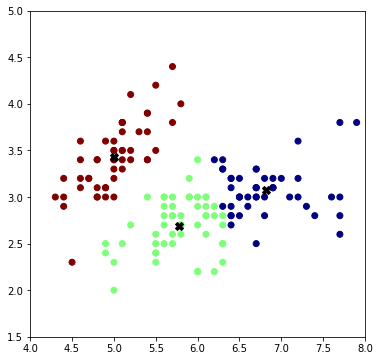

In [10]:
plt.figure(figsize=(6,6))
#voronoi_plot_2d(vor, figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap=plt.cm.jet)
plt.plot(centers[:,0], centers[:,1], 'kX', markersize=8)
plt.xlim([4, 8])
plt.ylim([1.5, 5])
plt.show()

In [11]:
#labels = ((2 * np.array(labels)) % 3)
#print(labels)
#print(y)

In [12]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.base import TransformerMixin

In [13]:
from sklearn.cluster import KMeans

In [14]:
class Reduce(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[:, :2]

In [15]:
def plot_decision_boundary(data, kmeans, title='No title', h=.001, model=None, 
                           highlight_centroids=False, ica=Reduce(), 
                           figsize=(6,6)):
    '''Based on https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
  
    Parameters
    ----------
    data - the dataset to be visualized with clusters
    kmeans - the clustering algorithm
    title - the title to displayed with the plot
    h - Step size of the mesh. Decrease to increase the quality of the VQ.
    model - model to re-learn projections in lower-dimensional space. Don't if None.
    highlight_centroids - whether to show the centroids (False)
      centroids might have little bearing in a different space.
    ica - a dimensionality reduction method with fit and transform. This has to result in
      two dimensions, e.g. FastICA(n_components=2)
    '''
    #ica = ica.fit(data)
    reduced_data = ica.fit_transform(data)
    if model is not None:
        svc = model.fit(reduced_data, kmeans.predict(data))
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1e-15, reduced_data[:, 0].max() + 1e-15
    y_min, y_max = reduced_data[:, 1].min() - 1e-15, reduced_data[:, 1].max() + 1e-15
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    if model:
        preds = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        preds = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    pred_dict = {predval: i for i, predval in enumerate(np.unique(preds))}
    Z = preds.reshape(xx.shape)
    plt.figure(figsize=figsize)
    plt.clf()
    plt.imshow(
        Z, interpolation=None,
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect='auto', origin='lower',
    )

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.colorbar()
    if highlight_centroids:
        # Plot the centroids as a white X
        centroids = ica.transform(kmeans.cluster_centers_)
        centroids = np.array([centroid for i, centroid in enumerate(centroids) if i in pred_dict])

        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='w', zorder=10)
    plt.title(title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [16]:
clf = KMeans(n_clusters=3)

In [17]:
clf.fit(X[:,:2])

KMeans(n_clusters=3)

In [18]:
clf.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

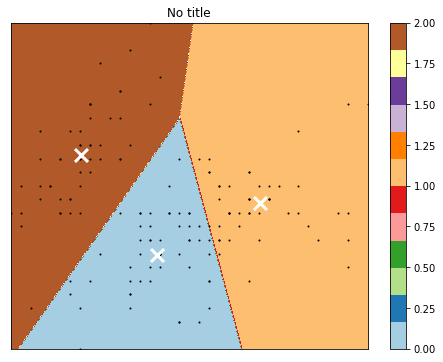

In [19]:
plot_decision_boundary(X, clf, figsize=(8,6), highlight_centroids=True)

## Image Quantization

In [20]:
I = plt.imread('horse.jpg')

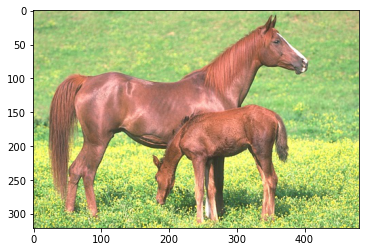

In [21]:
plt.figure()
plt.imshow(I)
plt.show()

In [22]:
sh = I.shape
sh

(321, 481, 3)

In [23]:
I[0,0,:]

array([58, 63, 40], dtype=uint8)

In [24]:
# matriz de datos
Iflat = I.reshape(-1,3)

In [25]:
Iflat.shape

(154401, 3)

In [26]:
Iflat[:10]

array([[ 58,  63,  40],
       [ 55,  64,  33],
       [136, 149, 105],
       [194, 213, 157],
       [184, 209, 144],
       [168, 195, 128],
       [168, 197, 133],
       [156, 184, 123],
       [159, 187, 126],
       [163, 189, 126]], dtype=uint8)

In [27]:
k = 4     # número de clústers
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='auto', init='random')

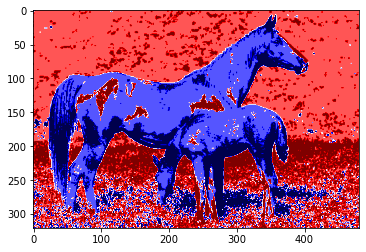

In [28]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='seismic')
plt.show()

In [29]:
result = np.zeros(sh).reshape(-1,3)

# asignamos a cada pixel su centroide (color promedio)
for i in range(0, k):
    result[labels == i] = centers[i]

result = result.reshape(sh).astype(np.uint8)

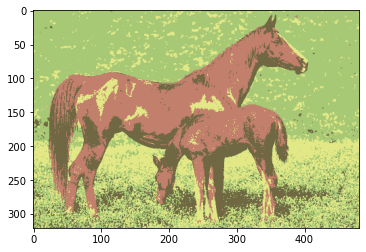

In [30]:
plt.figure()
plt.imshow(result)
plt.show()

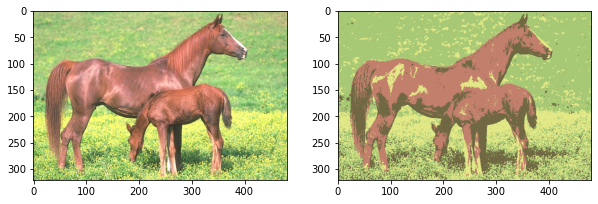

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

## Image Quantization

In [32]:
I = plt.imread('tree.jpg')

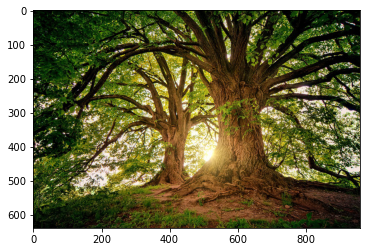

In [33]:
plt.figure()
plt.imshow(I)
plt.show()

In [34]:
sh = I.shape
sh

(639, 960, 3)

In [35]:
I[0,0,:]

array([ 3, 14,  8], dtype=uint8)

In [36]:
# matriz de datos
Iflat = I.reshape(-1,3)

In [37]:
Iflat.shape

(613440, 3)

In [38]:
Iflat[:10]

array([[ 3, 14,  8],
       [ 3, 13,  5],
       [ 7, 15,  2],
       [ 8, 23,  2],
       [ 5, 32,  1],
       [ 3, 41,  2],
       [ 7, 49,  9],
       [20, 54, 21],
       [21, 41, 16],
       [20, 31, 15]], dtype=uint8)

In [39]:
k = 4      # número de clústers
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='auto', init='random')

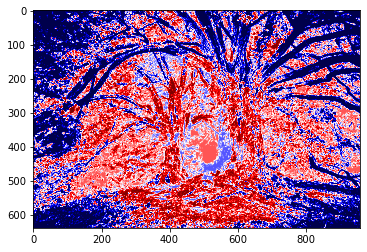

In [40]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='seismic')
plt.show()

In [41]:
result = np.zeros(sh).reshape(-1,3)

# asignamos a cada pixel su centroide (color promedio)
for i in range(0, k):
    result[labels == i] = centers[i] 

result = result.reshape(sh).astype(np.uint8)

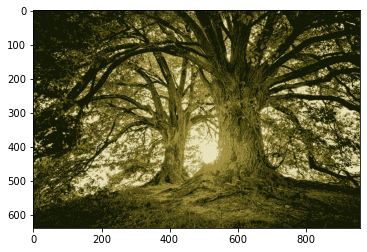

In [42]:
plt.figure()
plt.imshow(result)
plt.show()

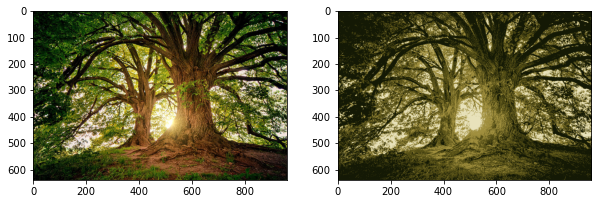

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

### Otro ejemplo

In [44]:
from skimage.data import chelsea

In [45]:
I = chelsea()

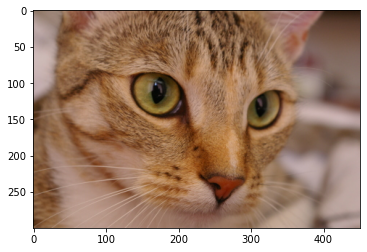

In [46]:
plt.figure()
plt.imshow(I)
plt.show()

In [47]:
sh = I.shape
sh

(300, 451, 3)

In [48]:
Iflat = I.reshape(-1,3)

In [49]:
k = 24
centers, labels, u = k_means(Iflat, n_clusters=k, algorithm='auto', init='random')

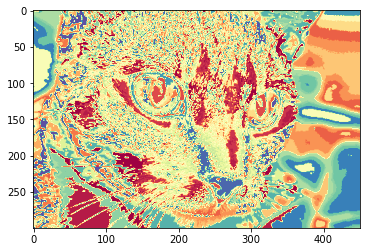

In [50]:
plt.figure()
plt.imshow(labels.reshape(sh[0], sh[1]), cmap='Spectral')
plt.show()

In [51]:
result = np.zeros(sh).reshape(-1,3)

for i in range(0, k):
    result[labels == i] = centers[i] 

result = result.reshape(sh).astype(np.uint8)

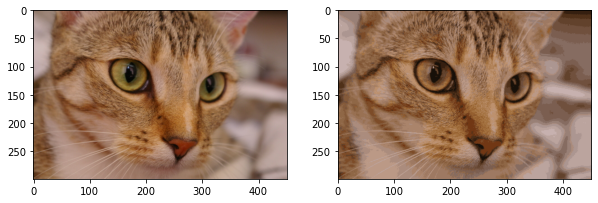

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()